# Week 7: 

In [33]:
# Imports and helpers
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class EulerResult:
    t: np.ndarray
    y: np.ndarray
    h: float
    method: str


def forward_euler(f, t0, y0, t_end, h):
    n = int(np.floor((t_end - t0) / h))
    t = t0 + np.arange(n + 1) * h
    y = np.zeros(n + 1, dtype=float)
    y[0] = y0
    for k in range(n):
        y[k+1] = y[k] + h * f(t[k], y[k])
    return EulerResult(t, y, h, "Forward Euler")


def backward_euler_linear(lambda_, t0, y0, t_end, h):
    # For y' = lambda y, implicit Euler: y_{n+1} = y_n / (1 - h*lambda)
    n = int(np.floor((t_end - t0) / h))
    t = t0 + np.arange(n + 1) * h
    y = np.zeros(n + 1, dtype=float)
    y[0] = y0
    denom = (1 - h * lambda_)
    for k in range(n):
        y[k+1] = y[k] / denom
    return EulerResult(t, y, h, "Backward Euler")


def plot_solutions(results, exact_fn, title):
    plt.figure(figsize=(8,5))
    ts = np.linspace(results[0].t[0], results[0].t[-1], 500)
    plt.plot(ts, exact_fn(ts), 'k--', label='Exact')
    for r in results:
        plt.plot(r.t, r.y, marker='o', label=f"{r.method} (h={r.h})")
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


def l2_error(res, exact_fn):
    return np.sqrt(np.mean((res.y - exact_fn(res.t))**2))

print("Setup complete.")

Setup complete.


## Part (a): Forward Euler for y' = -5 y, y(0)=1

- IVP: $y' = -5 y, y(0) = 1$. Exact: $y(t) = e^{-5t}$
- Interval: [0, 10]
- Steps: $h \in {0.4, 0.41, 0.1}$

Notes:
- Forward Euler update for $y' = λ y$ is $y_{n+1} = (1 + hλ) y_n$.
- Stability for decay $(λ < 0)$: require $|1 + hλ| < 1$. With $λ = -5$ this gives $0 < h < 0.4$.
  - h=0.4 is marginal $(|1 + hλ| = |1 - 2| = 1) → $ no decay; oscillatory sign flips.
  - h=0.41 is unstable $(|1 + hλ| = 1.05) →$ grows in magnitude with sign flips.
  - h=0.1 is stable $(|1 + hλ| = 0.5) →$ decays geometrically.

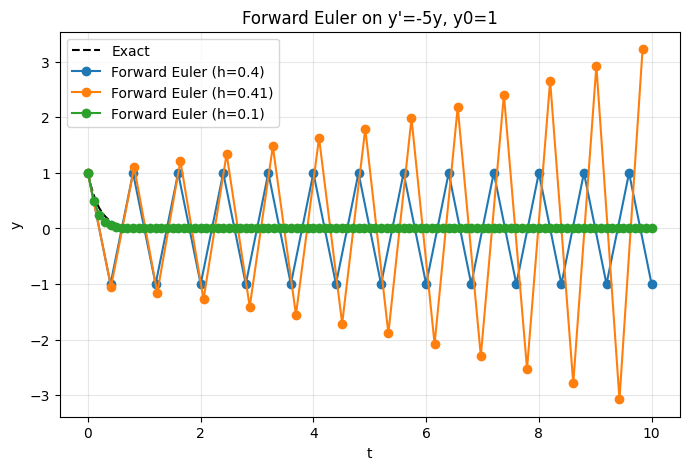

h=0.40, amplification=1+h*lambda=-1.000, L2 error=9.856e-01, y(end)=-1.000e+00
h=0.41, amplification=1+h*lambda=-1.050, L2 error=2.014e+00, y(end)=3.225e+00
h=0.10, amplification=1+h*lambda=0.500, L2 error=2.106e-02, y(end)=7.889e-31


In [34]:
# Part (a) computations
lam_a = -5.0
f_a = lambda t, y: lam_a * y
exact_a = lambda t: np.exp(lam_a * t)

results_a = []
for h in [0.4, 0.41, 0.1]:
    res = forward_euler(f_a, 0.0, 1.0, 10.0, h)
    results_a.append(res)

# Plot
plot_solutions(results_a, exact_a, "Forward Euler on y'=-5y, y0=1")

# Errors
for r in results_a:
    print(f"h={r.h:0.2f}, amplification=1+h*lambda={1 + r.h*lam_a:0.3f}, L2 error={l2_error(r, exact_a):.3e}, y(end)={r.y[-1]:.3e}")

## Part (b): Backward Euler for y' = 5 y, y(0)=1

- IVP: $y' = 5 y, y(0) = 1$. Exact: $y(t) = e^{5t}$
- Interval: [0, 10]
- Steps: $h \in {0.4, 0.41, 0.1}$

Notes:
- Backward Euler update for $y' = λ y$ is $y_{n+1} = y_n / (1 - hλ)$.
- A-stable: for $λ$ with $Re(λ) < 0$, unconditional stability. For positive $λ$, it still grows but is numerically well-defined if $1 - hλ ≠ 0$.
  - With $λ = 5$, denominators: $1 - 5h = {-1.0, -1.05, 0.5} →$ all nonzero, so method steps are well-defined.
  - Expect rapid growth for all h, with accuracy improving as h decreases.

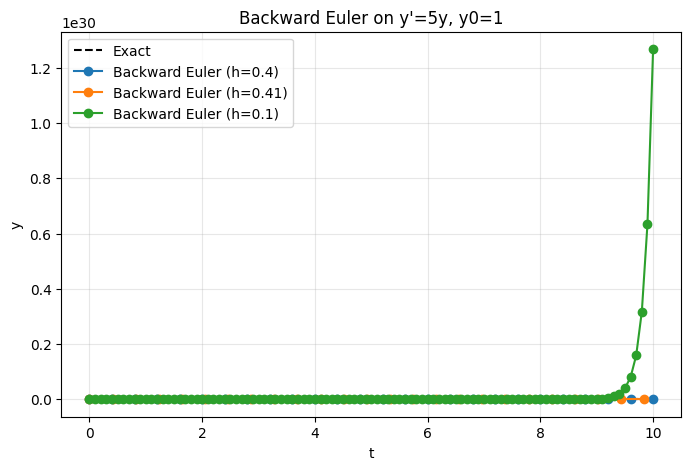

h=0.40, amplification=1/(1-h*lambda)=-1.000, L2 error=1.026e+21, y(end)=-1.000e+00
h=0.41, amplification=1/(1-h*lambda)=-0.952, L2 error=4.698e+20, y(end)=3.101e-01
h=0.10, amplification=1/(1-h*lambda)=2.000, L2 error=1.456e+29, y(end)=1.268e+30


In [35]:
# Part (b) computations
lam_b = 5.0
exact_b = lambda t: np.exp(lam_b * t)

results_b = []
for h in [0.4, 0.41, 0.1]:
    res = backward_euler_linear(lam_b, 0.0, 1.0, 10.0, h)
    results_b.append(res)

# Plot
plot_solutions(results_b, exact_b, "Backward Euler on y'=5y, y0=1")

# Errors
for r in results_b:
    denom = 1 - r.h*lam_b
    amp = 1/denom
    print(f"h={r.h:0.2f}, amplification=1/(1-h*lambda)={amp:0.3f}, L2 error={l2_error(r, exact_b):.3e}, y(end)={r.y[-1]:.3e}")

## Discussion

- Forward Euler on decay $(λ = -5)$:
  - $h=0.1$: stable and decays toward zero; small but noticeable discretization error that shrinks with $h$.
  - $h=0.4$: amplification factor = 1 → magnitude constant with sign flip each step; fails to capture decay, so large global error over time.
  - $h=0.41$: $|1 + hλ| = 1.05 > 1 →$ unstable; solution blows up in magnitude with alternating sign.
- Backward Euler on growth $(λ = 5)$:
  - The method is A-stable (excellent for λ < 0), but here λ > 0 so the true solution grows.
  - Large h can qualitatively distort the dynamics: 1 − 5h controls the step factor 1/(1 − 5h).
    - $h=0.4$ :factor = 1: no growth in magnitude and sign flips, while the exact solution stays positive and grows.
    - $h=0.41$ : factor ≈ 0.952: spurious decay with sign flips, completely wrong qualitative behavior.
    - $h=0.1$ : factor = 2: growth per step somewhat larger than exact $e^{0.5} ≈ 1.6487$, but qualitatively correct and more accurate.


## Forward Euler for logistic equation y' = y(1 − y)

We analyze the forward Euler discretization for the logistic ODE:

- ODE: $y' = y(1 − y)$, with equilibria at $y = 0$ and $y = 1$.
- Forward Euler: $y_{n+1} = y_n + h y_n(1 − y_n) = y_n [1 + h(1 − y_n)]$.

Analysis:
- Positivity: $y_{n+1} > 0$ if $1 + h(1 − y_n) > 0$. Worst case in (0,1) is $y_n → 1$, giving $1 + h(0) = 1 > 0$, so positivity holds automatically for h > 0.
- Staying below 1: require $y_{n+1} < 1$ for $y_n ∈ (0,1)$.
  $ y_{n+1} = y_n + h y_n(1 − y_n) < 1 ⇔ h < (1 − y_n)/[y_n(1 − y_n)] = 1/y_n $.
  Worst case is $y_n → 1$, giving bound $h < 1$. Thus $h < 1$ ensures $0 < y_{n+1} < 1$ if $0 < y_n < 1$.
- Monotonicity: $y_{n+1} − y_n = h y_n(1 − y_n) > 0$ for $h > 0$ and $y_n ∈ (0,1)$. So any h > 0 yields monotone increase while $y_n ∈ (0,1)$. Combined with the invariance above, $h < 1$ gives monotone increase within (0,1).

Conclusion:
- For solutions starting in (0,1), forward Euler is qualitatively correct (stays in (0,1), increases to 1 without oscillations) if 0 < h < 1.
- If 1 ≤ h < 2: still converges to 1 but with oscillations and possible overshoot outside (0,1) on intermediate steps.
- If h ≥ 2: the fixed point y = 1 is unstable for the discretization; dynamics can diverge.

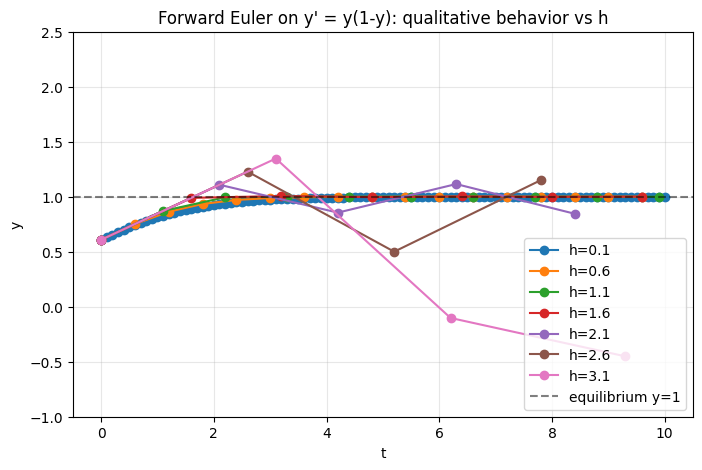

In [45]:
# Logistic equation demo: forward Euler behavior vs h

import random


def logistic_fe(y0, h, nsteps):
    y = np.zeros(nsteps+1)
    y[0] = y0
    for k in range(nsteps):
        y[k+1] = y[k] + h*y[k]*(1 - y[k])
    return y

y0 = random.uniform(0.1, 0.9)
hs = list(np.arange(0.1, 3.6, 0.5))  
T = 10.0
nsteps_by_h = {h: int(T/h) for h in hs}

plt.figure(figsize=(8,5))
for h in hs:
    n = nsteps_by_h[h]
    y = logistic_fe(y0, h, n)
    t = np.arange(n+1)*h
    plt.plot(t, y, marker='o', label=f"h={h}")

plt.axhline(1.0, color='k', linestyle='--', alpha=0.5, label='equilibrium y=1')
plt.title("Forward Euler on y' = y(1-y): qualitative behavior vs h")
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(-1, 2.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()